### ADOPCIONES 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship, \
                              plot_combined_graphs, plot_grouped_boxplots, plot_grouped_histograms, grafico_dispersion_con_correlacion, \
                              bubble_plot, tricategorical_analysis

In [2]:
df_adopciones = pd.read_csv("pet_adoption_data.csv")
df_adopciones.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


##### Significado de las variables

| Variable | Descripción |
| -------- | ----------- |
| PetID | Número de identificación del animal |
| PetType | Animal |
| Breed | Raza |
| AgeMonths | Edad en meses |
| Color | Color del pelaje |
| Size | Tamaño del animal|
| WeightKg | Peso del animal en kg|
| Vaccinated | Vacunado (1) o no (0) |
| HealthCondition | Sano (0) o medicado (1) |
| TimeInShelterDays | Días que lleva el animal en el refugio |
| AdoptionFee | "Donación": Dinero que da la persona que adopta para parar los cuidados del animal en el refugio |
| PreviousOwner | El animal tenía dueño (1) o no (0) |
| AdoptionLikehood | Animal adoptado (1) o no(0) |

##### ¿Qué variables necesito?

Teniendo en cuenta que quiero saber qué probabilidad hay de que se adopte al animal en función del tipo de animal, raza, edad, color, tamaño y el tiempo que lleva el animal en el refugio, voy a eliminar:

- PetID
- WeightKg

In [3]:
df_adopciones = df_adopciones.drop(["PetID", "WeightKg"], axis = 1)

In [4]:
df_adopciones = df_adopciones.rename(columns = {"PetType": "animal", "Breed": "raza", "AgeMonths": "edad_meses", "Color": "color",
                                                "Size": "tamaño", "Vaccinated": "vacunacion", "HealthCondition": "estado_salud", "TimeInShelterDays": "dias_refugio",
                                                "AdoptionFee": "deposito", "PreviousOwner": "dueño_prev", "AdoptionLikelihood": "adopcion"})

In [5]:
df_adopciones.info() # El dataset viene sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal        2007 non-null   object
 1   raza          2007 non-null   object
 2   edad_meses    2007 non-null   int64 
 3   color         2007 non-null   object
 4   tamaño        2007 non-null   object
 5   vacunacion    2007 non-null   int64 
 6   estado_salud  2007 non-null   int64 
 7   dias_refugio  2007 non-null   int64 
 8   deposito      2007 non-null   int64 
 9   dueño_prev    2007 non-null   int64 
 10  adopcion      2007 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.6+ KB


In [6]:
df_adopciones["edad_años"] = round((df_adopciones["edad_meses"]/12), 2)
df_adopciones = df_adopciones.drop(["edad_meses"], axis = 1)

In [29]:
df_adopciones.groupby(["tamaño"])["raza"].value_counts()

tamaño  raza            
Large   Parakeet            150
        Rabbit              145
        Siamese              84
        Persian              76
        Labrador             65
        Golden Retriever     55
        Poodle               55
Medium  Parakeet            179
        Rabbit              172
        Siamese              94
        Persian              90
        Labrador             67
        Poodle               60
        Golden Retriever     52
Small   Rabbit              176
        Parakeet            158
        Persian              86
        Siamese              75
        Labrador             61
        Golden Retriever     55
        Poodle               52
Name: count, dtype: int64

In [27]:
df_adopciones[df_adopciones["tamaño"] == "Large"].nunique()

animal            4
raza              7
color             5
tamaño            1
vacunacion        2
estado_salud      2
dias_refugio     89
deposito        354
dueño_prev        2
adopcion          2
edad_años       174
dtype: int64

In [7]:
for columna in df_adopciones:
    print(df_adopciones[columna].value_counts(), "\n")

animal
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64 

raza
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64 

color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64 

tamaño
Medium    714
Small     663
Large     630
Name: count, dtype: int64 

vacunacion
1    1407
0     600
Name: count, dtype: int64 

estado_salud
0    1613
1     394
Name: count, dtype: int64 

dias_refugio
15    40
52    36
21    32
6     30
3     30
      ..
40    14
32    14
16    12
80    12
11     9
Name: count, Length: 89, dtype: int64 

deposito
111    11
181    10
423    10
87     10
88     10
       ..
73      1
151     1
182     1
343     1
26      1
Name: count, Length: 493, dtype: int64 

dueño_prev
0    1401
1     606
Name: count, dtype: int64 

adopcion
0    1348
1     659
Name: c

In [8]:
for columna in df_adopciones:
    print(df_adopciones[columna].value_counts(), "\n")

animal
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64 

raza
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64 

color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64 

tamaño
Medium    714
Small     663
Large     630
Name: count, dtype: int64 

vacunacion
1    1407
0     600
Name: count, dtype: int64 

estado_salud
0    1613
1     394
Name: count, dtype: int64 

dias_refugio
15    40
52    36
21    32
6     30
3     30
      ..
40    14
32    14
16    12
80    12
11     9
Name: count, Length: 89, dtype: int64 

deposito
111    11
181    10
423    10
87     10
88     10
       ..
73      1
151     1
182     1
343     1
26      1
Name: count, Length: 493, dtype: int64 

dueño_prev
0    1401
1     606
Name: count, dtype: int64 

adopcion
0    1348
1     659
Name: c

In [9]:
df_adopciones.describe()

,vacunacion,estado_salud,dias_refugio,deposito,dueño_prev,adopcion,edad_años
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351,7.689995
std,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730,4.345744
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.080000
25%,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000,4.000000
50%,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000,7.830000
75%,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000,11.500000
max,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000,14.920000


#### Dataset limpio:

| Variable | Descripción |
| -------- | ----------- |
| animal | Especies: Gato, perro, pájaro... |
| raza | Raza |
| edad_años | Edad en años |
| color | Color del pelaje |
| tamaño | Tamaño del animal|
| vacunacion | Vacunado (1) o no (0) |
| estado_salud | Sano (0) o medicado (1) |
| dias_refugio | Días que lleva el animal en el refugio |
| deposito | "Donación": Dinero que da la persona que adopta para parar los cuidados del animal en el refugio |
| dueño_prev | El animal tenía dueño (1) o no (0) |
| adopcion | Animal adoptado (1) o no(0) |

***

In [10]:
df_adopciones.nunique()

animal            4
raza              7
color             5
tamaño            3
vacunacion        2
estado_salud      2
dias_refugio     89
deposito        493
dueño_prev        2
adopcion          2
edad_años       179
dtype: int64

In [13]:
# Cardinalidad variables:

def card (df, umbral_categoria, umbral_continua):
    
    cardinalidad = df.nunique()
    porcentaje_card = df.nunique()/len(df) * 100
    tipos = []

    for col in df.columns:
        card = cardinalidad[col]
        pct = porcentaje_card[col]

        if card == 2:
            tipos.append("Binaria")
        
        elif card <= umbral_categoria:
            tipos.append("Categórica")
   
        else: 
            if pct >= umbral_continua:
                tipos.append("Numérica Continua")
            else:
                tipos.append("Numérica Discreta")

    
    df_resultado = pd.DataFrame({"Cardinalidad" : cardinalidad, "% Cardinalidad" : porcentaje_card, "Tipo Variable": tipos})
    return df_resultado

In [14]:
card(df_adopciones, 7, 80)

,Cardinalidad,% Cardinalidad,Tipo Variable
animal,4,0.199302,Categórica
raza,7,0.348779,Categórica
color,5,0.249128,Categórica
tamaño,3,0.149477,Categórica
vacunacion,2,0.099651,Binaria
estado_salud,2,0.099651,Binaria
dias_refugio,89,4.434479,Numérica Discreta
deposito,493,24.564026,Numérica Discreta
dueño_prev,2,0.099651,Binaria
adopcion,2,0.099651,Binaria


In [15]:
# Separar variables categóricas de numéricas:

categoricas = ["animal", "raza", "color", "tamaño", "vacunacion", "estado_salud", "dueño_prev", "adopcion"]
numericas = ["dias_refugio", "deposito", "edad_años"]

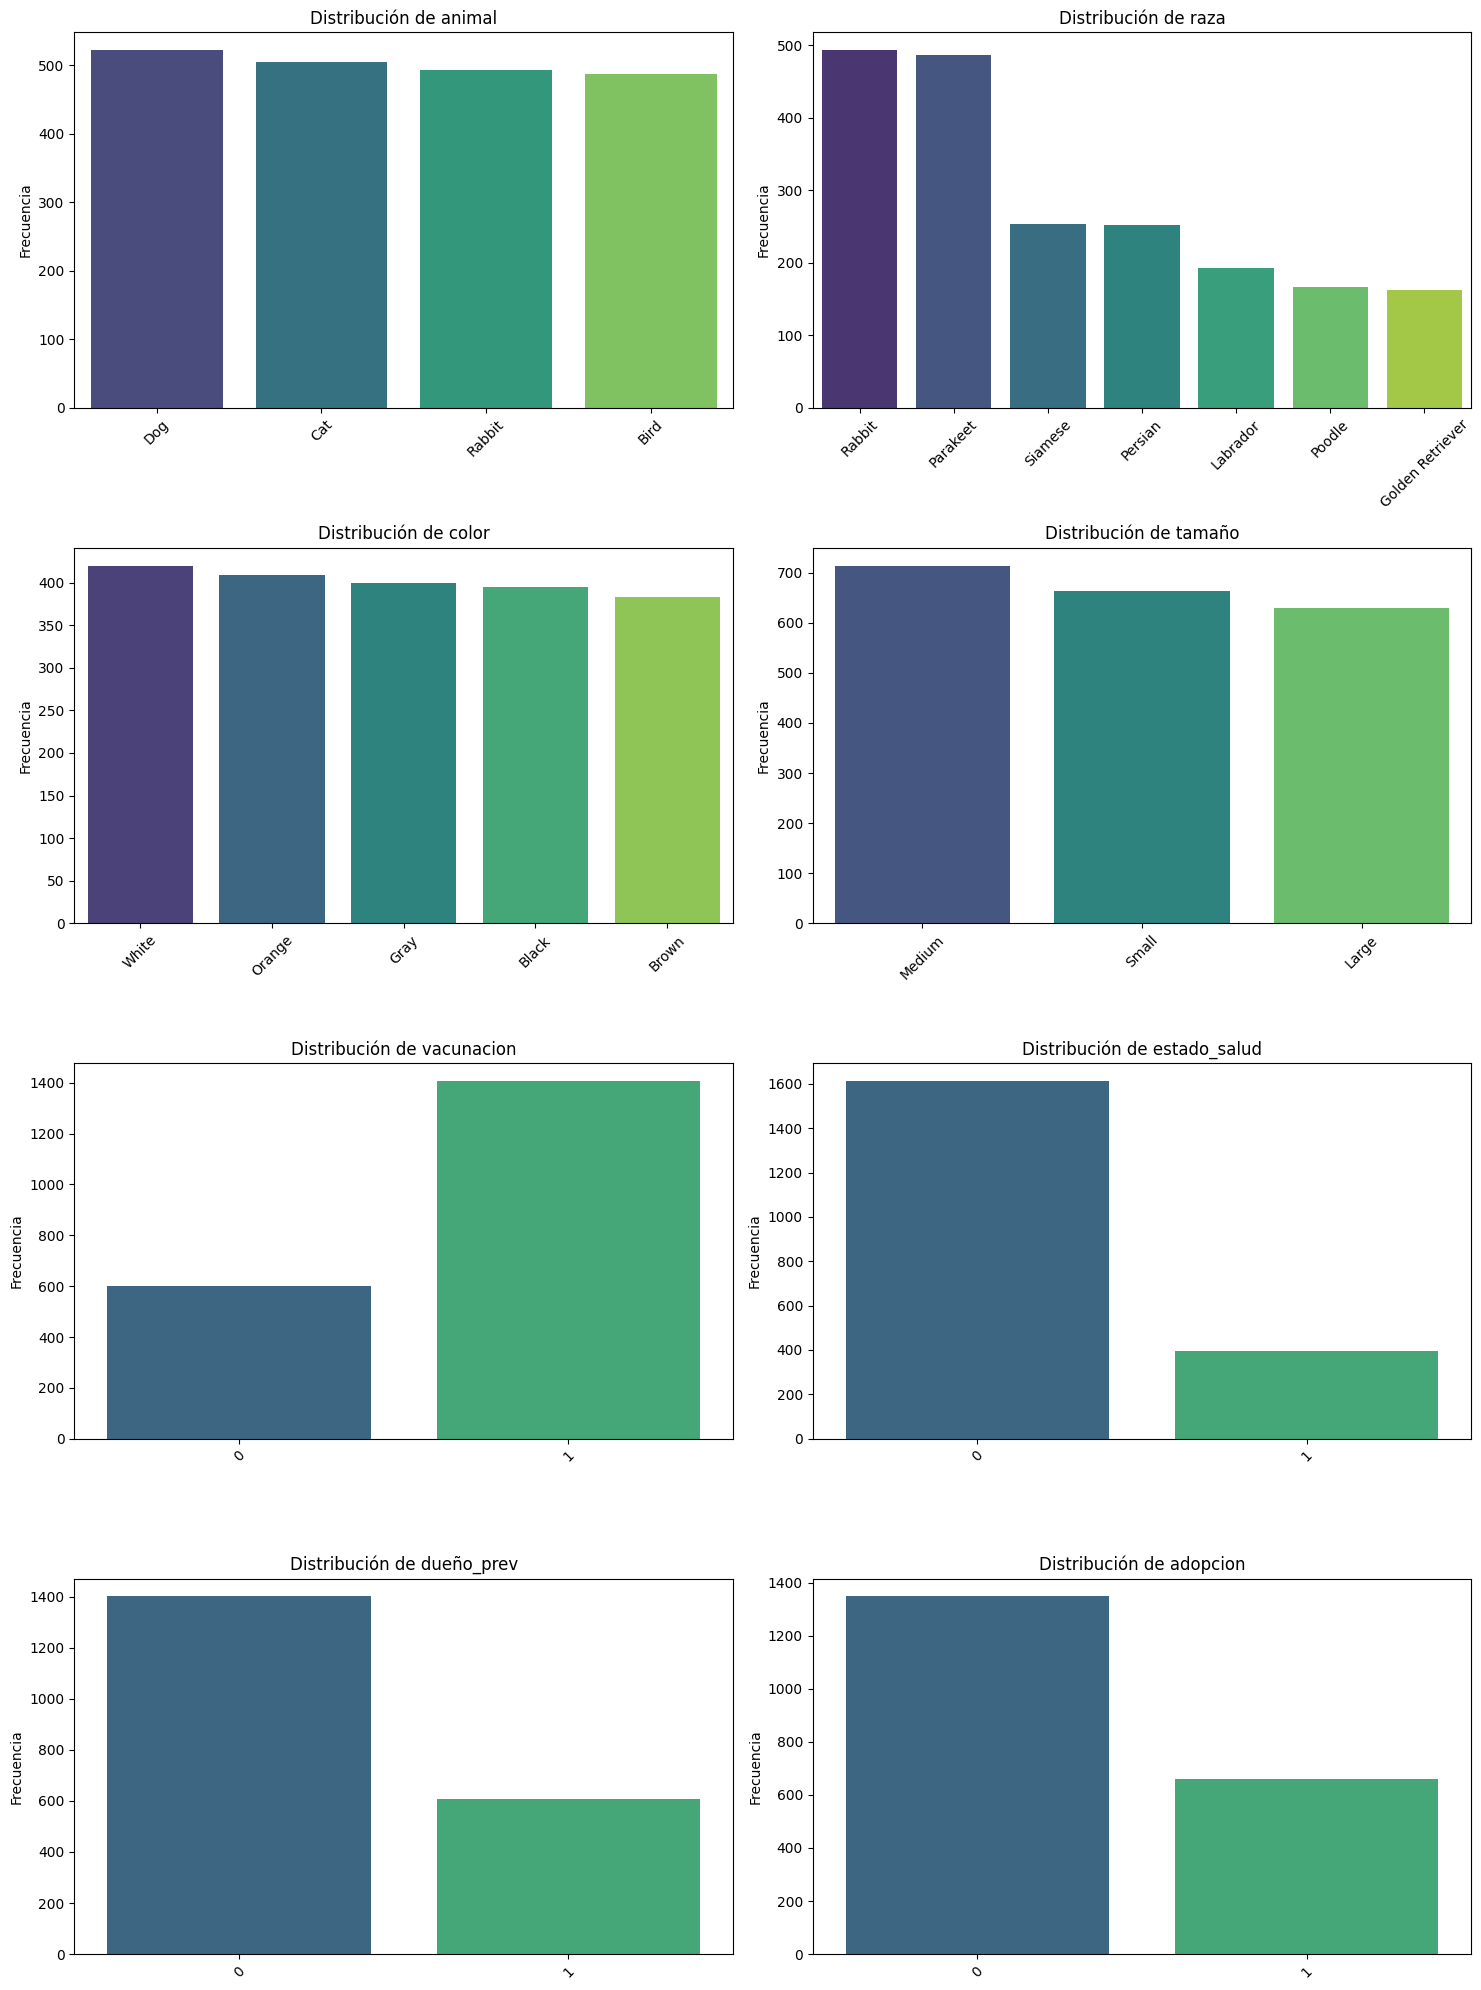

In [16]:
# Ver gráficamente las categóricas:

pinta_distribucion_categoricas(df_adopciones, categoricas)

Según se observa en las gráficas (de frecuencias absolutas):

- Hay más cantidad de perros que del resto de animales, pero el número de individuos es muy similar.  

- En cuanto a la raza, en el dataset se desconoce la raza de conejos y periquitos, por eso salen valores tan altos de estos dos grupos. Pero, obervando el resto de categorías, se observa que las dos razas de gatos (siamés y persa), están muy igualadas, seguidas por tres razas de perros también con unos valores bastante similares.  

- El color del pelaje predominante es el blanco, pero apenas hay diferencia entre las categorías.  

- Lo mismo ocurre con los tamaños, siendo predominante por muy poco el tamaño mediano.

- En cuanto a la vacunación, hay más animales vacunados (1) que no (0). También se observan más animales sanos (0) que medicados (1).  

- La mayor parte de animales no tenían dueño antes de ser registrados, pero hay una cantidad importante (rozando los 700 individuos), que sí tenían dueño previo a su entrada en el refugio.

- En cuanto a la adopción, se observa que la cantidad de animales no adoptados (0) es muy alta, pero como en el caso anterior, casi 700 animales sí han sido adoptados.

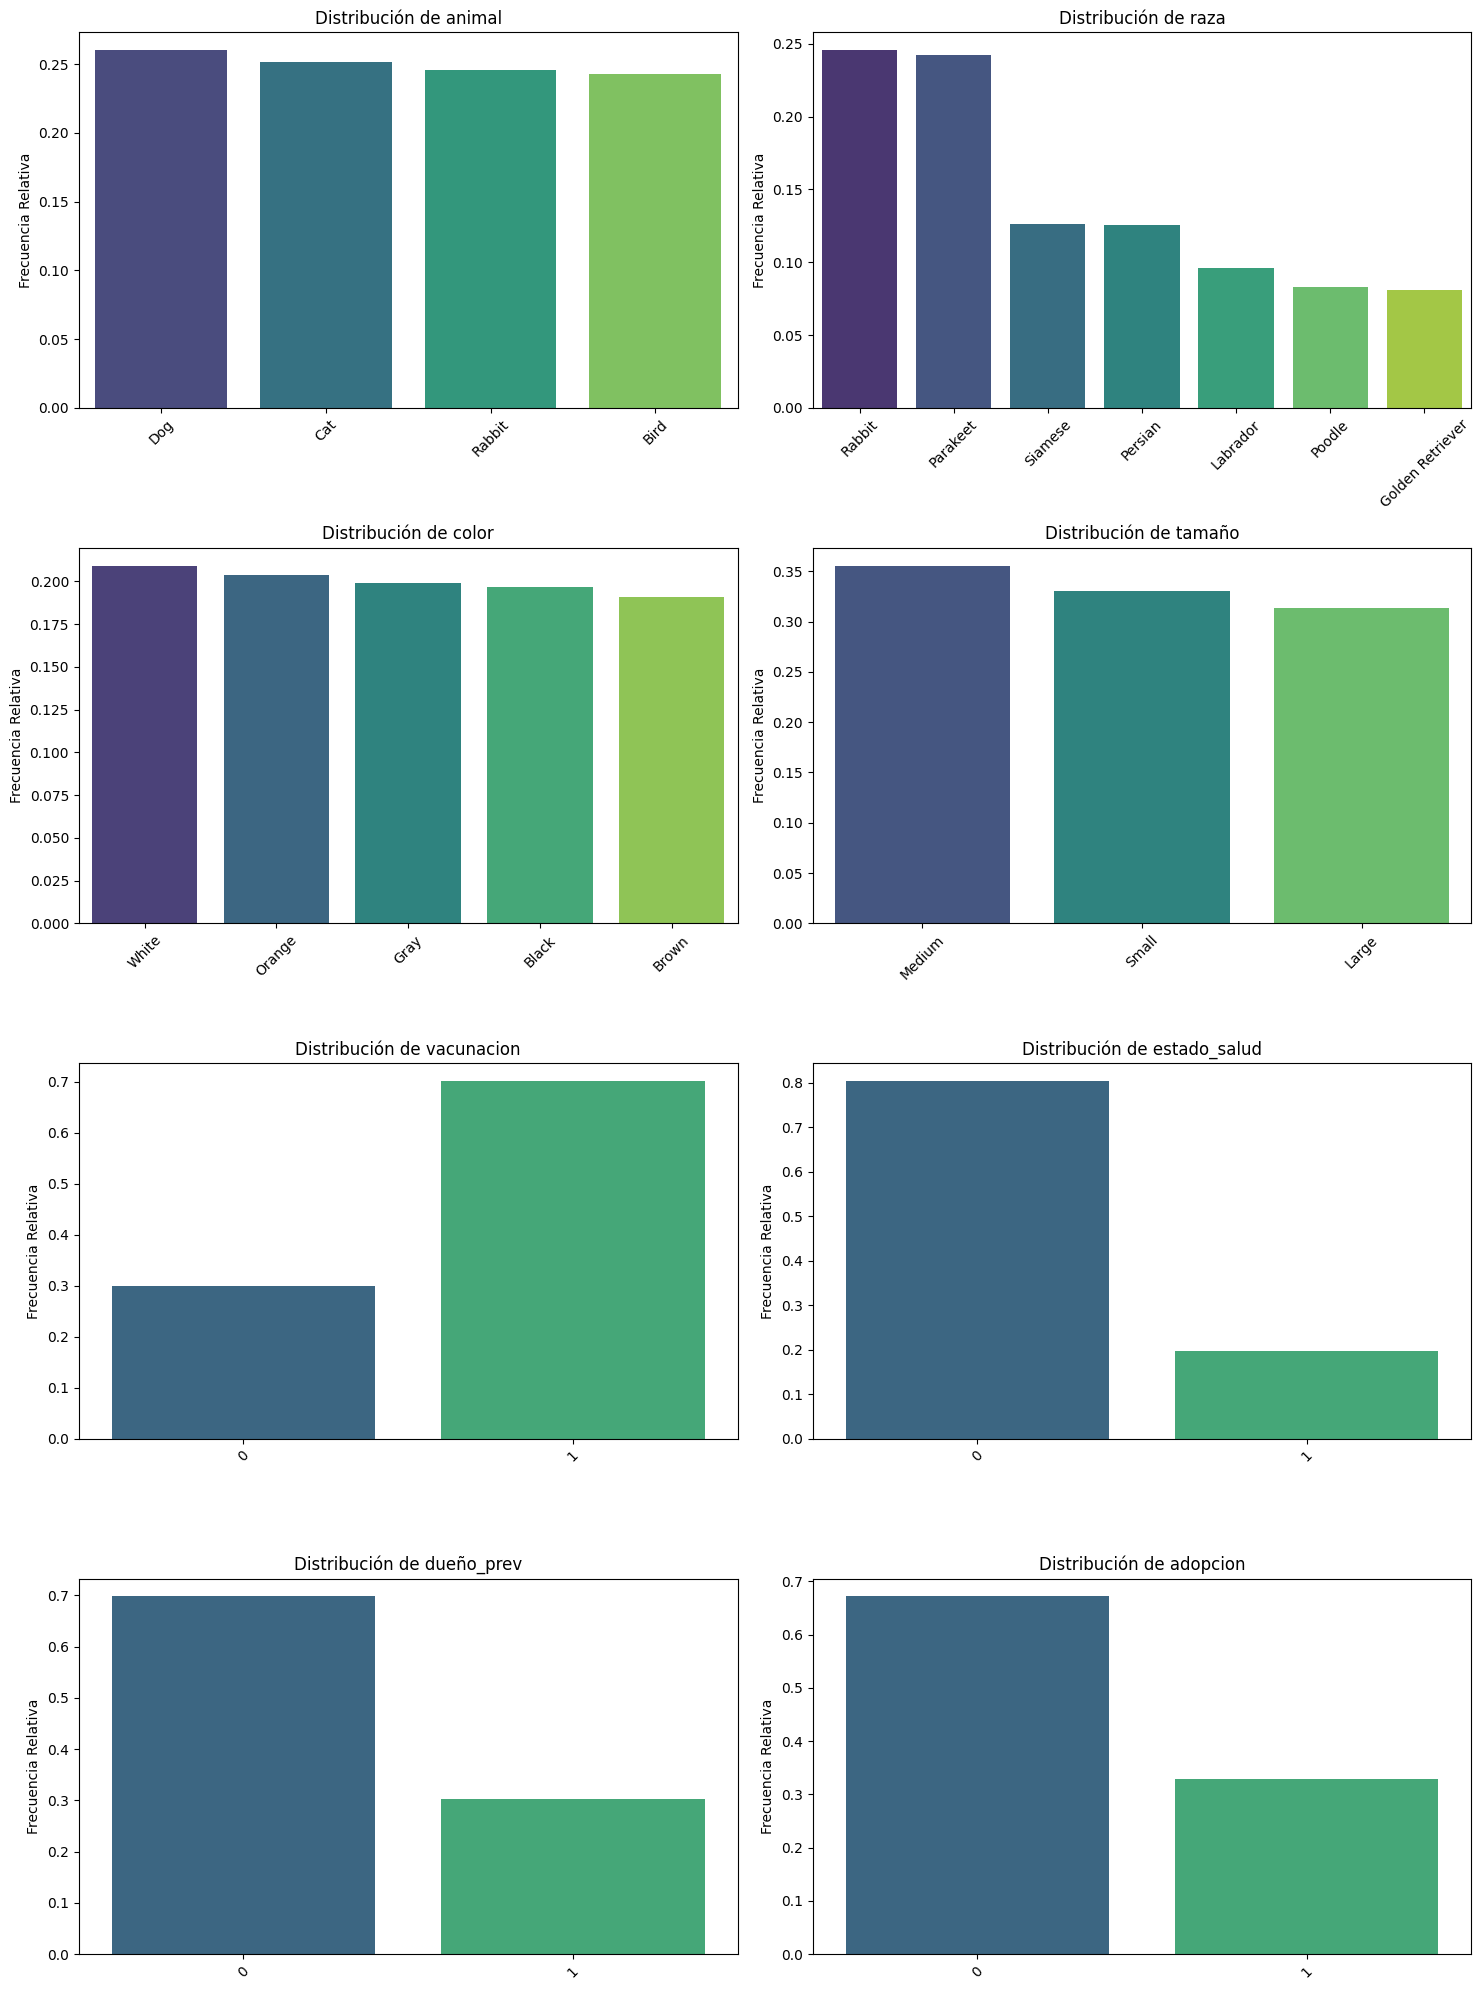

In [17]:
pinta_distribucion_categoricas(df_adopciones, categoricas, relativa = True)

Interesante comparar:

- Distribución dueño_prev con adopción: La mayor parte de los no adoptados, no tenían dueño previo. Puede ser que los adoptados tuvieran dueño previo ppor tener un carácter concreto, saber relacionarse con personas y otros individuos de su misma especie, y haber vivido en una casa anteriormente.  


- Distribución estado_salud con vacunacion: Es probable, que un estado de salud óptimo esté relacionado con la vacunación.  

- Distribución raza con tamaño: Puede ser que la gráfica de los tamaños esté influenciada por las razas por: 

    - El tamaño mediano puede asociarse a conejos, gatos y raza poodle.
    - El tamaño pequeño puede asociarse a periquitos